In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
#import the trainset and the test set
os.chdir('C:/Users/Cynthia Suprihanta/OneDrive/Aston University/Business Project/data/overall')

trainset = pd.read_csv('Final Trainset.csv')
testset = pd.read_csv('Final Testset.csv')

In [3]:
print(trainset.shape)
print(testset.shape)

(3568, 67)
(897, 67)


In [4]:
print(trainset.columns)
print(testset.columns)

Index(['age', 'club_mv', 'club_match_played', 'club_match_won',
       'club_match_draw', 'club_match_lose', 'club_total_goals',
       'club_goals_conceded', 'contract_expired', 'height', 'weight', 'rating',
       'shots_total', 'shots_on', 'goals_total', 'goals_conceded',
       'goals_assists', 'passes_total', 'passes_key', 'passes_accuracy',
       'tackles_total', 'tackles_blocks', 'tackles_interceptions',
       'duels_total', 'duels_won', 'dribbles_attempts', 'dribbles_success',
       'fouls_drawn', 'fouls_committed', 'cards_yellow', 'cards_yellowred',
       'cards_red', 'penalty_won', 'penalty_success', 'penalty_missed',
       'penalty_saved', 'games_appearences', 'games_minutes_played',
       'games_lineups', 'substitutes_in', 'substitutes_out',
       'substitutes_bench', 'google_search', 'twitter_avgretweets',
       'twitter_avglikes', 'youtube_avgview', 'youtube_avglike',
       'youtube_avgdislike', 'youtube_avgcomment', 'Defender', 'Goalkeeper',
       'Midfielder',

In [5]:
print(trainset.isna().sum())
print(testset.isna().sum())

age                  0
club_mv              0
club_match_played    0
club_match_won       0
club_match_draw      0
                    ..
duels_pg             0
passes_pg            0
dribbles_pg          0
club_contribution    0
market_value         0
Length: 67, dtype: int64
age                  0
club_mv              0
club_match_played    0
club_match_won       0
club_match_draw      0
                    ..
duels_pg             0
passes_pg            0
dribbles_pg          0
club_contribution    0
market_value         0
Length: 67, dtype: int64


In [6]:
print(trainset.info())
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3568 non-null   float64
 1   club_mv                3568 non-null   float64
 2   club_match_played      3568 non-null   float64
 3   club_match_won         3568 non-null   float64
 4   club_match_draw        3568 non-null   float64
 5   club_match_lose        3568 non-null   float64
 6   club_total_goals       3568 non-null   float64
 7   club_goals_conceded    3568 non-null   float64
 8   contract_expired       3568 non-null   float64
 9   height                 3568 non-null   float64
 10  weight                 3568 non-null   float64
 11  rating                 3568 non-null   float64
 12  shots_total            3568 non-null   float64
 13  shots_on               3568 non-null   float64
 14  goals_total            3568 non-null   float64
 15  goal

## 1. Train the Model

In [7]:
# drop labels for training set, but keep all others
Xtrain = trainset.drop("market_value", axis=1)
ytrain = trainset["market_value"].copy()

In [8]:
# Creating baseline based on the median value of the Number of Casualties in training set

median_mv = ytrain.median()
median_mv

14.508658238524095

In [11]:
# Measure the baseline in the term of RMSE

from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_price
yhat = np.full((ytrain.shape[0], 1), median_mv)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

print(f"The baseline RMSE is : {baseline_rmse}")

The baseline RMSE is : 1.5928873061365463


### 1.1 Linear Regression

In [12]:
# linear regression
# create linear regression best model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [13]:
# fit the model into Xtrain and ytrain
lin_reg.fit(Xtrain, ytrain)

# generate the R-squared of the model
r2=lin_reg.score(Xtrain, ytrain)

print(f"The R2 of linear regression is :{r2}")

The R2 of linear regression is :0.7836201916225174


In [14]:
# see the linear regression base model rmse

# make predictions
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

print(f"The RMSE for linear regression base model is :{lin_rmse}")

The RMSE for linear regression base model is :0.7407098835567506


In [15]:
# check ViF to ensure the multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])]
vif["features"] = Xtrain.columns

C:\Users\Cynthia Suprihanta\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [16]:
pd.options.display.max_rows = 4000
vif.round(1)

,VIF Factor,features
0,1.5,age
1,3.2,club_mv
2,inf,club_match_played
3,inf,club_match_won
4,inf,club_match_draw
5,inf,club_match_lose
6,8.6,club_total_goals
7,6.5,club_goals_conceded
8,1.4,contract_expired
9,2.7,height


### 1.2 Ridge Regression

In [17]:
# create ridge regression base model

from sklearn.linear_model import Ridge

ridge = Ridge(random_state=7)

In [18]:
# fit the model
ridge.fit(Xtrain,ytrain)

Ridge(random_state=7)

In [19]:
# make predictions
yhat = ridge.predict(Xtrain)

ridge_rmse = mean_squared_error(ytrain, yhat)

# take square root
ridge_rmse = np.sqrt(ridge_rmse)

print(f"The RMSE of Ridge base model :{ridge_rmse}")

The RMSE of Ridge base model :0.7311057028072232


In [20]:
# generate the R-squared of the model
r2=ridge.score(Xtrain, ytrain)

print(f"The R2 of ridge regression is :{r2}")

The R2 of ridge regression is :0.7891950543133619


### 1.3 Lasso Regression

In [21]:
# create ridge regression base model

from sklearn.linear_model import Lasso

lasso = Lasso(random_state=7)

In [22]:
# fit the model
lasso.fit(Xtrain,ytrain)

Lasso(random_state=7)

In [23]:
# make predictions
yhat = lasso.predict(Xtrain)

lasso_rmse = mean_squared_error(ytrain, yhat)

# take square root
lasso_rmse = np.sqrt(lasso_rmse)

print(f"The RMSE of Lasso base model :{lasso_rmse}")

The RMSE of Lasso base model :1.5074113104570848


In [24]:
# generate the R-squared of the model
r2=lasso.score(Xtrain, ytrain)

print(f"The R2 of Lasso regression is :{r2}")

The R2 of Lasso regression is :0.1038432265087742


### 1.4 Decision Tree

In [25]:
# create base model of decision tree
from sklearn.tree import DecisionTreeRegressor
tree_base = DecisionTreeRegressor()

In [26]:
# Look at parameters used by decision tree
from pprint import pprint

print('Parameters currently used in Decision Tree:\n')
pprint(tree_base.get_params())

Parameters currently used in Decision Tree:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [27]:
# Check the RMSE of base decision tree

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores = cross_val_score(tree_base, Xtrain, ytrain,
                         scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.95393037 0.94268192 0.92221021 0.84776815 0.91208567 0.85979476
 0.91223502 0.99268846 0.91241046 0.88448456]
Mean: 0.9140289586187936
Standard deviation: 0.041087337475349886


In [28]:
print(f'The RMSE for decision tree base model: 0.914')

The RMSE for decision tree base model: 0.914


### 1.5 Random Forest

In [29]:
# create random forest base model
from sklearn.ensemble import RandomForestRegressor
rf_base = RandomForestRegressor()

In [30]:
# Look at parameters used by current forest
print('Parameters currently used in Random Forest:')
pprint(rf_base.get_params())

Parameters currently used in Random Forest:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [31]:
# Check the RMSE of random forest
scores = cross_val_score(rf_base, Xtrain, ytrain,
                         scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.70023161 0.58900722 0.68446822 0.62979935 0.6027354  0.63430705
 0.61602306 0.65075895 0.63818531 0.61838217]
Mean: 0.6363898343926586
Standard deviation: 0.03280485502119065


In [32]:
print(f'The RMSE for random forest base model: 0.63')

The RMSE for random forest base model: 0.63


## 2. Hyperparameter Tuning and Cross Validation

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def evaluate_model(model, X, y):
    """Given a model object, predictors and the target, fit and evaluate a model,
    output its RMSE on the training set and on the validation set
    """

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=7)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_val)

    # record the results
    train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train))
    val_rmse = np.sqrt(mean_squared_error(y_val_predict, y_val))
    
    return train_rmse, val_rmse

### 2.1 Ridge Regression 

In [34]:
from sklearn.linear_model import RidgeCV

# 1. Fine-tune
regr_cv = RidgeCV(alphas=(1,3,5,7,10),cv = 10)

# 2. Fit the model
model_cv = regr_cv.fit(Xtrain,ytrain)

# 3. check alpha
print (f"alpha: {model_cv.alpha_}")

alpha: 10


In [35]:
# 4. create model with best alpha
best_ridge = Ridge(random_state=7, alpha=10)
best_ridge.fit(Xtrain, ytrain) 

Ridge(alpha=10, random_state=7)

In [36]:
# make prediction based on polynomial feature of xtest
yhat = best_ridge.predict(Xtrain)

# calculate the final rmse
final_mse = mean_squared_error(ytrain, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.7311702480222837

In [37]:
# 5. evaluate the model
train_rmse, val_rmse = evaluate_model(best_ridge, Xtrain, ytrain)
print(f"Ridge best model: Train: {train_rmse}, validation: {val_rmse}")

Ridge best model: Train: 0.7319165198227281, validation: 0.7341083381986255


In [38]:
# 6. check ridge best model r2
r2=best_ridge.score(Xtrain, ytrain)

print(f"The R2 of ridge regression is :{r2}")

The R2 of ridge regression is :0.7886004204590239


In [39]:
#7. see the coefficient shape
best_ridge.coef_.shape

(66,)

In [40]:
# 8. absolute score
abs_scores = np.abs(best_ridge.coef_)

for score, name in sorted(zip(abs_scores, Xtrain.columns), reverse=True):

    print(f"{name}: {score}")

club_mv: 0.8641862203930099
age: 0.3148434022560122
tackles_pg: 0.22696869330671504
goals_pg: 0.22048662093743845
tackles_total: 0.19833176779091974
club_contribution: 0.19582948001243608
duels_won: 0.17319434226927477
passes_pg: 0.16823451872588502
games_minutes_played: 0.1475568433671589
games_appearences: 0.13988163705718246
duels_pg: 0.13917555904136625
substitutes_bench: 0.1359806384440563
contract_expired: 0.12828335652245285
goals_total: 0.1196825365964743
games_lineups: 0.10904825316376524
passes_accuracy: 0.10643730441213252
shots_total: 0.10585473685642424
youtube_avgcomment: 0.10439593004640264
substitutes_in: 0.07792114963862612
club_match_played: 0.07434100707600316
club_total_goals: 0.07025704100017169
assists_pg: 0.06536970894986398
passes_total: 0.06239706591784045
rating: 0.06033699961719102
captain: 0.05860100031178534
duels_accuracy: 0.057307542127807615
twitter_avglikes: 0.04891841550327367
dribbles_success: 0.044977803837866766
Midfielder: 0.04264346622573078
dribb

### 2.2 Lasso Regression  

In [41]:
from sklearn.linear_model import LassoCV

# 1. fine tune
regr_cv = LassoCV(alphas= None,cv = 10)

In [42]:
# 2. fit the model
model_cv = regr_cv.fit(Xtrain,ytrain)

In [43]:
# 3. check alpha
print (f"alpha: {model_cv.alpha_}")

alpha: 0.012051940903959543


In [44]:
# 4. create model with best alpha
best_lasso = Lasso(random_state=7, alpha=0.012, max_iter=1000000).fit(Xtrain,ytrain)

In [45]:
# make prediction based on Xtrain
yhat = best_lasso.predict(Xtrain)

# calculate the final rmse
train_mse = mean_squared_error(ytrain, yhat)
train_rmse = np.sqrt(final_mse)
train_rmse

0.7407709216629448

In [46]:
# 5. evaluate the model
train_rmse, val_rmse = evaluate_model(best_lasso, Xtrain, ytrain)
print(f"Lasso best model: Train: {train_rmse}, validation: {val_rmse}")

Lasso best model: Train: 0.7427810509510053, validation: 0.7190723797864104


In [47]:
# 6. check lasso best model r2
r2=best_lasso.score(Xtrain, ytrain)

print(f"The R2 of lasso regression is :{r2}")

The R2 of lasso regression is :0.783776070313845


In [48]:
#7. see the coefficient shape
best_lasso.coef_.shape

(66,)

In [49]:
# 8. absolute score
abs_scores = np.abs(best_lasso.coef_)

for score, name in sorted(zip(abs_scores, Xtrain.columns), reverse=True):

    print(f"{name}: {score}")

club_mv: 0.8736225253068938
games_appearences: 0.5343965629400252
age: 0.2938695472678351
goals_pg: 0.1334016639736841
contract_expired: 0.12481175127168538
substitutes_bench: 0.11982142476386146
youtube_avgcomment: 0.08414465671326035
rating: 0.0760164884887505
passes_pg: 0.05350300047222386
captain: 0.04987272088585037
dribbles_pg: 0.03744142094436745
height: 0.03512117386304733
Midfielder: 0.031009410490112466
google_search: 0.025505581116281383
youtube_avgview: 0.02488073554830728
dribbles_accuracy: 0.022565798099716223
passes_accuracy: 0.022118633876201672
shots_accuracy: 0.021919414484955768
assists_pg: 0.021805212083040666
club_total_goals: 0.01685951976616879
youtube_avglike: 0.015651936718769466
dribbles_success: 0.015597410529323254
games_minutes_played: 0.010857709157755155
tackles_total: 0.009087338255301856
club_match_played: 0.008446893262959814
club_contribution: 0.007407692608051276
twitter_avglikes: 0.006001510318455141
right: 0.0050333476038626835
weight: 0.0036816479

In [50]:
coeff_used = np.sum(best_lasso.coef_!=0)
coeff_used

30

### 2.3 Decision Tree

In [51]:
# cross validation the random forest with grid search cross validation

from sklearn.model_selection import GridSearchCV

# Minimum number of samples required to split a node
min_samples_split = [15,20,25]

# Maximum number of levels in tree
max_depth = [None,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,25,30]

# Create the random grid
param_grid ={'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

tree_grid = DecisionTreeRegressor()
# Random search of parameters will use 10 fold cross validation and search across 9 different combinations.
tree_grid = GridSearchCV(tree_grid, param_grid, cv=10,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

#fit the result to the Xtrain and ytrain
tree_grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 20, 30],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [15, 20, 25]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
# show the random forest best estimators
tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=20, min_samples_leaf=25, min_samples_split=25)

In [53]:
# RMSE of the random forest
np.sqrt(-tree_grid.best_score_)

0.7831923964541823

In [54]:
# Comparison of RMSE in validation set and train set
val_scores = tree_grid.cv_results_["mean_test_score"]
train_scores = tree_grid.cv_results_["mean_train_score"]
params = tree_grid.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

0.7856635443119897 0.6239455971409353 {'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 15}
0.7856635443119899 0.6239455971409353 {'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 20}
0.7856635443119899 0.6239455971409353 {'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 25}
0.7831923964541825 0.6486456732379239 {'max_depth': None, 'min_samples_leaf': 25, 'min_samples_split': 15}
0.7831923964541824 0.6486456732379239 {'max_depth': None, 'min_samples_leaf': 25, 'min_samples_split': 20}
0.7831923964541824 0.6486456732379239 {'max_depth': None, 'min_samples_leaf': 25, 'min_samples_split': 25}
0.7980531824863105 0.6746139730540182 {'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 15}
0.7980531824863107 0.6746139730540182 {'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 20}
0.7980531824863107 0.6746139730540182 {'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 25}
0.7856635443119899 0.6239455971409353

### 2.4 Random Forest

In [10]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid_rf = {
'max_depth': [20, None],
'min_samples_leaf': [6,8],
'min_samples_split': [15,20],
'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
random_grid = GridSearchCV(rf, param_grid_rf,
cv = 10, scoring='neg_mean_squared_error',
return_train_score=True)
#fit the result to the Xtrain and ytrain
random_grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, None], 'min_samples_leaf': [6, 8],
                         'min_samples_split': [15, 20],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
# show the random forest best estimators
random_grid.best_estimator_

RandomForestRegressor(min_samples_leaf=6, min_samples_split=15,
                      n_estimators=200)

In [56]:
# RMSE of the random forest
np.sqrt(-random_grid.best_score_)

0.6416426066149289

In [57]:
# Comparison of RMSE in validation set and train set
val_scores = random_grid.cv_results_["mean_test_score"]
train_scores = random_grid.cv_results_["mean_train_score"]
params = random_grid.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

0.6443648827099511 0.43162770554981356 {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 100}
0.6433651043879123 0.4307721733022518 {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 200}
0.6467777230399467 0.4612533085388673 {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 100}
0.6457006302211926 0.46121509706263203 {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 200}
0.6470496837622893 0.45621371584309667 {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}
0.6461722559059525 0.4551343301283359 {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 200}
0.6499358151110576 0.4762665811639174 {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
0.6469634920009988 0.4746371315930876 {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 20

## 3. Testing the Data

In [58]:
# drop labels for training set, but keep all others
Xtest = testset.drop("market_value", axis=1)
ytest = testset["market_value"].copy()

In [60]:
# create polynomial version of Xtest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(Xtest)

# first standartize X_poly
scaler = StandardScaler()
X_poly_test = scaler.fit_transform(X_poly)

In [61]:
# create polynomial features of Xtrain

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(Xtrain)

# first standartize X_poly
scaler = StandardScaler()
X_poly_st = scaler.fit_transform(X_poly)

### 3.1 Ridge Regression

In [86]:
# create the polynomial version of ridge regression

# 1. Fine-tune
regr_cv = RidgeCV(alphas=(1000,2000,5000,10000),cv = 10)

# 2. Fit the model
model_cv = regr_cv.fit(X_poly_st,ytrain)

# 3. check alpha
print (f"alpha: {model_cv.alpha_}")

alpha: 10000


In [87]:
# 4. create model with best alpha
ridge_poly = Ridge(random_state=7, alpha=10000)
ridge_poly.fit(X_poly_st, ytrain) 

Ridge(alpha=10000, random_state=7)

In [88]:
# make prediction based on polynomial feature of xtest
yhat = ridge_poly.predict(X_poly_st)

# calculate the final rmse
final_mse = mean_squared_error(ytrain, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.4649703695987691

In [90]:
# 5. evaluate the model
train_rmse, val_rmse = evaluate_model(ridge_poly, X_poly_st, ytrain)
print(f"Ridge best model: Train: {train_rmse}, validation: {val_rmse}")

Ridge best model: Train: 0.46521853955230247, validation: 0.7421868109864571


In [91]:
# 6. check ridge best model r2
r2=ridge_poly.score(X_poly_st, ytrain)

print(f"The R2 of ridge regression is :{r2}")

The R2 of ridge regression is :0.9014477757008367


In [ ]:
# test the ridge regression

In [92]:
# insert best model 
best_model_ridge = ridge_poly

In [95]:
# make prediction based on polynomial feature of xtest
yhat = best_model_ridge.predict(X_poly_test)

# calculate the final rmse
final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.7708666361296146

In [96]:
# generate the R-squared of the model
r2=best_model_ridge.score(X_poly_test, ytest)

print(f"The R2 of ridge regression is :{r2}")

The R2 of ridge regression is :0.7673029801057856


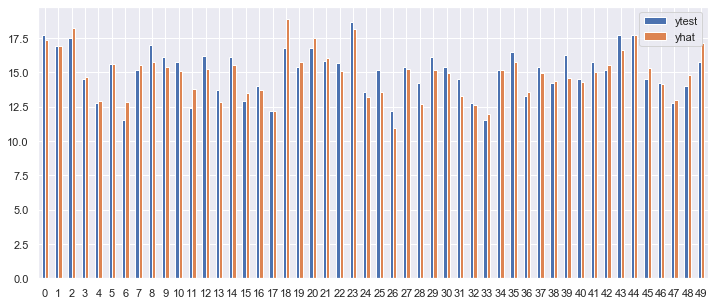

In [97]:
# see the estimation of the model made by testset visually

# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

### 3.2 Random Forest

#### 3.2.1 Overall Feature Importance

In [63]:
# put them into a separate variable for convenience
feature_importances = random_grid.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the trainset dataframe,
# so we can "zip" the two and print in the descending order:
for k, v in sorted(zip(feature_importances, trainset.columns), reverse=True):
    print(f"{v}: {k}")

club_mv: 0.5059953984938241
age: 0.09759632345944655
passes_total: 0.08457796169969878
games_minutes_played: 0.05794761148921609
games_appearences: 0.0530644919613562
club_contribution: 0.02566606560306713
youtube_avgview: 0.021696321356480558
youtube_avgcomment: 0.016196159952524943
youtube_avglike: 0.015552254474994321
substitutes_bench: 0.010921005851470935
rating: 0.008641727278284474
google_search: 0.007925087075406501
duels_total: 0.007584384305127448
games_lineups: 0.007583960340003654
youtube_avgdislike: 0.0065969605259316045
shots_total: 0.005293007290504521
contract_expired: 0.0040235717942687845
goals_pg: 0.0035079688318426536
shots_on: 0.0031655197267389037
club_goals_conceded: 0.0029550594459885698
club_match_lose: 0.0028831679165530633
club_total_goals: 0.0027612721331092063
dribbles_attempts: 0.0026067101648554547
passes_pg: 0.0025307780284015095
passes_accuracy: 0.002525093384799146
duels_won: 0.0024968564132374243
duels_accuracy: 0.0024720785876447336
dribbles_success:

#### 3.2.2 Drop Column Feature Importance 

In [64]:
# create a function to display the result of feature importance.

def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
    
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [65]:
# create a function that calculate the importance of each variable.
# the calculation is done by see the difference between original model score and the model without related variable.

from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [67]:
# calculate the drop column feature importance
drop_imp = drop_col_feat_imp(random_grid.best_estimator_, Xtrain, ytrain)

In [68]:
drop_imp

,feature,feature_importance
0,age,3.170823e-02
1,club_mv,2.751548e-02
2,substitutes_bench,2.255980e-03
3,contract_expired,1.116198e-03
4,google_search,8.892665e-04
5,club_contribution,5.428123e-04
6,passes_total,4.331032e-04
7,rating,3.854910e-04
8,passes_accuracy,2.959651e-04
9,club_total_goals,2.923567e-04


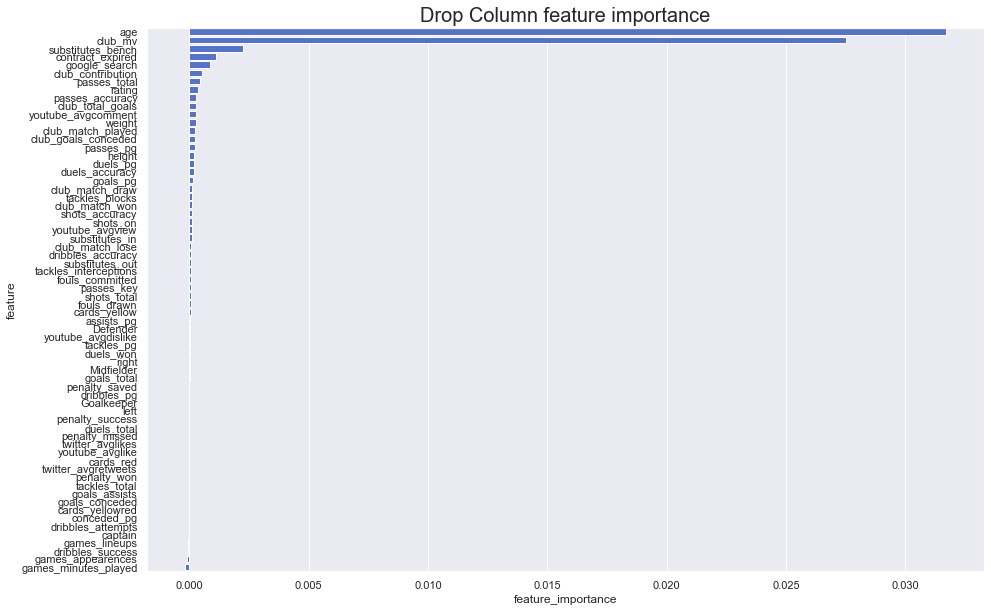

In [69]:
# plot the column into a graph
var_imp_plot(drop_imp, 'Drop Column feature importance')

In [70]:
# see the index with the largest error and smallest error

pred_diff = pd.DataFrame({'difference': abs(ytrain - random_grid.best_estimator_.predict(Xtrain))})

print('Index with smallest error:', pred_diff.sort_values('difference').head(1).index.values[0])
print('Index with largest error:', pred_diff.sort_values('difference', ascending = False).head(1).index.values[0])

Index with smallest error: 1250
Index with largest error: 4


In [71]:
# perform LIME to understand the importance feature and the type of influence of independent variable in dependent variable in specific variable.

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain.values,
                                                   mode = 'regression',
                                                   feature_names = Xtrain.columns,
                                                   categorical_features=[6], 
                                                   categorical_names=['Defender', 'Goalkeeper',
                                                                      'Midfielder', 'left', 'right', 'captain'], 
                                                   discretize_continuous = True)

In [72]:
# see the important feature and the type of influence of independent variable in index with smallest error
np.random.seed(833)
exp = explainer.explain_instance(Xtrain.values[833], random_grid.best_estimator_.predict, num_features=5)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

# see the important feature and the type of influence of independent variable in index with largest error
np.random.seed(4)
exp = explainer.explain_instance(Xtrain.values[4], random_grid.best_estimator_.predict, num_features=5)
exp.show_in_notebook(show_all=False)

In [75]:
# see the estimation of the model made by trainset visually
forest_reg = RandomForestRegressor(n_estimators=200, max_depth=20)
forest_reg.fit(Xtrain.values[:3212,:], ytrain.values[:3212])
yhat = forest_reg.predict(Xtrain.values[3212:, :])

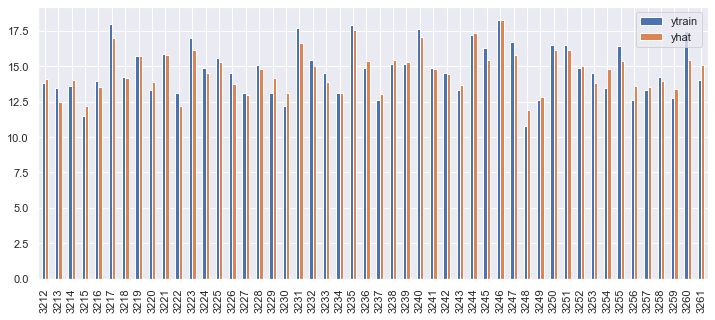

In [76]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[3212:3212+50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar")

In [79]:
cond_idx = np.abs(ytrain[3212:] - yhat)/ytrain[3212:] < 0.5

In [80]:
cond_idx.sum()

356

In [81]:
trainset[3212:][cond_idx]

,age,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,club_total_goals,club_goals_conceded,contract_expired,height,...,dribbles_accuracy,goals_pg,assists_pg,conceded_pg,tackles_pg,duels_pg,passes_pg,dribbles_pg,club_contribution,market_value
3212,0.143977,-0.651017,0.987439,-1.021832,0.959805,1.100909,-0.311925,1.181554,-0.268611,0.591432,...,0.137000,-0.042816,1.001526,-0.147087,-0.587705,0.275070,-0.896308,0.246237,-0.416536,13.815512
3213,-0.310032,-0.853632,-1.727923,-0.509240,-0.256636,-0.243193,-0.886082,-0.293064,-0.268611,0.285557,...,1.661708,-0.601688,-0.565445,-0.147087,-0.354033,-0.457163,-0.646967,-0.565828,-1.165514,13.458837
3214,0.370982,-0.651017,-1.727923,-0.850968,-1.473077,0.908894,-1.345408,-0.219333,-1.166591,0.897306,...,0.254285,-0.601688,0.125866,-0.147087,1.790253,0.484592,0.408445,-0.036700,0.148078,13.592368
3215,-1.445055,-0.936210,-0.370242,-0.338376,-0.864856,0.716879,0.262233,0.960361,-0.268611,-0.632067,...,-1.387709,-0.601688,-0.565445,-0.147087,-0.821377,-0.922566,-0.973568,-0.284729,-1.519668,11.512935
3216,-0.537037,-1.007338,-1.727923,-1.363561,-1.168966,1.292923,-1.173161,0.296783,0.712714,0.591432,...,-1.387709,0.856239,-0.565445,-0.147087,-0.821377,-1.201807,-1.078924,-0.753228,0.804874,13.997833
3217,-0.537037,1.233243,0.987439,0.686809,-0.256636,-0.051179,0.434480,-0.219333,2.678053,1.356118,...,0.232294,0.750422,0.192767,-0.147087,0.233916,1.578597,0.732507,1.181220,0.966192,17.989898
3218,-0.537037,-1.063598,-1.727923,-0.167512,-0.560746,-0.435208,-0.254509,-0.514256,-0.268611,0.744369,...,-1.387709,0.856239,-0.565445,-0.147087,-0.821377,-1.201807,-1.078924,-0.753228,0.804874,14.220976
3219,-0.310032,0.917079,0.987439,-1.021832,-1.168966,2.445010,-0.828666,2.361248,-0.268611,-1.243816,...,0.354815,-0.182534,1.785011,-0.147087,-0.003525,-0.056917,-0.278224,0.558570,0.015567,15.761421
3220,1.279001,-0.651017,-1.727923,-0.850968,-1.473077,0.908894,-1.345408,-0.219333,-1.249937,0.744369,...,1.661708,-0.220639,-0.565445,-0.147087,0.134554,0.118243,1.009026,-0.625455,0.695408,13.304687
3221,-1.218051,0.100433,-1.727923,0.174216,0.047475,-1.203266,-0.139677,-1.915143,0.712714,-1.549690,...,0.950178,-0.601688,0.338577,-0.147087,0.841290,0.387721,0.963348,0.327924,1.133272,15.894952


In [ ]:
# testing the random forest

In [82]:
# create the model with test set
best_model = random_grid.best_estimator_
yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.6103179712765298

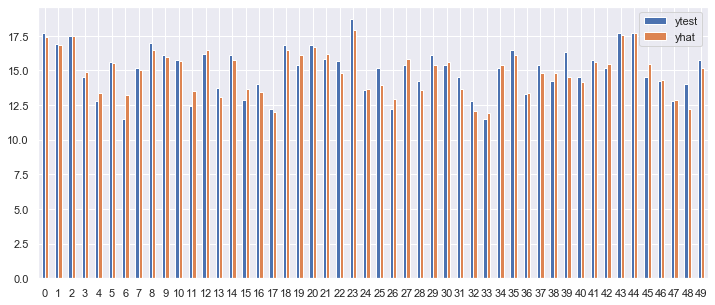

In [83]:
# see the estimation of the model made by testset visually

# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)